In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve,confusion_matrix
import mlflow
import mlflow.sklearn

In [15]:
cols =['Net_Fiber optic',
    'Electronic check',
    'Month-to-month',
    'DeviceProtection_No',
    'OnlineBackup_No',
    'OnlineSecurity_No',
    'TechSupport_No',
    'ten1-18',
    'MonthlyCharges',
    'Churn']

In [16]:
train = pd.read_csv('feature_x_train.csv', usecols= cols)

In [17]:
test = pd.read_csv('feature_x_test.csv', usecols= cols)

In [18]:
x_train = train.drop('Churn', axis= 1)
y_train = train.Churn
x_test = test.drop('Churn', axis= 1)
y_test = test.Churn

In [19]:
x_train.shape, x_test.shape

((6033, 9), (999, 9))

In [21]:
x_train.iloc[19]

MonthlyCharges         19.45
Net_Fiber optic         0.00
Electronic check        0.00
Month-to-month          0.00
DeviceProtection_No     0.00
OnlineBackup_No         0.00
OnlineSecurity_No       0.00
TechSupport_No          0.00
ten1-18                 0.00
Name: 19, dtype: float64

### Normalizing

In [7]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
def get_label(pred, threshold):
    y_pred = []
    for i in pred:
        if i[0] < threshold:
            y_hat = 1
        else:
            y_hat = 0
        y_pred.append(y_hat)
    return y_pred

### Metrics

In [9]:
def plot_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, annot= True, fmt= '.3g', cmap= plt.cm.ocean_r)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    return fig

In [10]:
def roc_plot(y_test, y_pred):
    fig, ax = plt.subplots()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    ax = plt.plot(fpr, tpr)
    ax = plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    return fig

### Params

In [11]:
max_iter = 50
threshold = 0.5
class_weight = 'balanced'

### Mlflow Pipeline

Active run_id: 40ad444fcbfe43edaf0ebb5d985dfffd


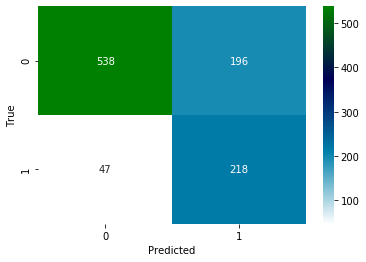

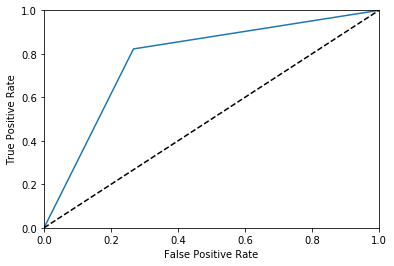

In [12]:
with mlflow.start_run():
    run = mlflow.active_run()
    print("Active run_id: {}".format(run.info.run_id))
    model = LogisticRegression(max_iter= max_iter, class_weight= class_weight)
    model.fit(x_train, y_train)
    
    pred = model.predict_proba(x_test)
    y_pred = get_label(pred, threshold= threshold)
    
    cm_fig = plot_confusion(y_test, y_pred)
    roc_fig = roc_plot(y_test, y_pred)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    mlflow.log_metrics({'val_accuracy' : accuracy})
    mlflow.log_params({'max_iter': max_iter, 'threshold': threshold, 'class_weight': class_weight})
    mlflow.log_figure(cm_fig, "confusion_matrix.png")
    mlflow.log_figure(roc_fig, "roc_curve.png")
    mlflow.sklearn.log_model(model, 'model')